## ADLUDIO CHALLENGE: TASK 4
1. importing libraries and loading data
2. Exploring the data 
3. Adding column features specified on the doc
4. Using **corr()** method of pandas to see the correlation between continuous variables
5. Plotting pair plot to see the correlation between the columns
6. Describing each pair plot and the correlation table

### 1. importing Libraries and loading data

In [21]:
# importing libraries and data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json


In [19]:
#simply importing the data from csv given or
data = pd.read_csv('../data/dataset.csv')

In [25]:
# parsing the json data provided
file = '../data/dataset.json'
with open(file) as json_file:
    json_data = json.load(json_file)

In [30]:
json_data = json_data['game_data']

In [32]:
df_json = pd.DataFrame(json_data, columns=json_data.keys())

In [34]:
# from the data we can see that the data improted from json and csv are similar 
# I am going to use the CSV
df_json.head()

,first_key,version,region,season,vertical,click-through-event,first_dropped,impression
0,00713d76908caaf66ef14688fe8229dd,5fa282721f46ca2dfabd,Asia,Autumn,Uncategorized,0,1,1
1,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Food & Drinks,1568,23607,54873
2,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Uncategorized,0,6,26
3,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Food & Drinks,0,0,6
4,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Uncategorized,0,31,85


### 2. Exploring the data

In [35]:

data.head()

,first_key,version,region,season,vertical,click-through-event,first_dropped,impression
0,00713d76908caaf66ef14688fe8229dd,5fa282721f46ca2dfabd,Asia,Autumn,Uncategorized,0.0,1.0,1.0
1,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Food & Drinks,1568.0,23607.0,54873.0
2,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Uncategorized,0.0,6.0,26.0
3,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Food & Drinks,0.0,0.0,6.0
4,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Uncategorized,0.0,31.0,85.0


In [4]:
data.shape

(3272, 8)

In [8]:
data.dtypes

first_key               object
version                 object
region                  object
season                  object
vertical                object
click-through-event    float64
first_dropped          float64
impression             float64
dtype: object

In [5]:
data.describe()

,click-through-event,first_dropped,impression
count,3.272000e+03,3.272000e+03,3.272000e+03
mean,3.195643e+03,1.234776e+04,9.026797e+04
std,2.827049e+04,8.562637e+04,6.505723e+05
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,7.000000e+00
50%,1.000000e+00,2.200000e+01,8.700000e+01
75%,3.822500e+02,3.060250e+03,2.310575e+04
max,1.240031e+06,2.318560e+06,1.419784e+07


### Description of columns From the given document
Data Columns

The data you are asked to analyse may contain a subset of the following columns

* Creative - an ad that is shown to a target in a web or mobile app 
* game_key               creative identifier           

#### Creative performance KPIs 
* click_through                                            the number of clicks at post-engagement screen
* engagements (first_dropped)                   the number of engagements
* Impressions                                       	 the total number of exposures at pre-engagement


* engagement_rate = ER = engagements/Impressions
* click_through_rate = CTR = click_throughs/Impressions

Overall size of creative (so we can derive relative size of engagement area in relation to absolute size)

Location and size of engagement trigger zone  - x / y coordinates are relative to the upper left corner of the creative

Location and size of engagement area - x / y coordinates are relative to the upper left corner of the creative. 

Region - geographical area identifier (subset of countries make up a region)
Season - calendar year division identifier 
Vertical - business type identifier (subset of similar businesses make up a vertical)
Target (KPIs) - business objective to maximise 


### 3. Adding engagement rate and click through rate columns

In [9]:
def add_rate_columns(df, numerator, denominotor, col_name):
    df[col_name] = df[numerator] / df[denominotor]
    
    return df

In [10]:
data = add_rate_columns(data, 'first_dropped', 'impression', 'ER')
data = add_rate_columns(data, 'click-through-event', 'impression',  'CTR')

data.head()

,first_key,version,region,season,vertical,click-through-event,first_dropped,impression,ER,CTR
0,00713d76908caaf66ef14688fe8229dd,5fa282721f46ca2dfabd,Asia,Autumn,Uncategorized,0.0,1.0,1.0,1.000000,0.000000
1,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Food & Drinks,1568.0,23607.0,54873.0,0.430212,0.028575
2,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Spring,Uncategorized,0.0,6.0,26.0,0.230769,0.000000
3,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Food & Drinks,0.0,0.0,6.0,0.000000,0.000000
4,015efcdd8de3698ffc4dad6dabd6664a,142dcad593832d3d624d,Uncategorized,Summer,Uncategorized,0.0,31.0,85.0,0.364706,0.000000


### 3. Checking a correlation between numerical columns

In [16]:
data.corr() #correlation between numerical columns

,click-through-event,first_dropped,impression,ER,CTR
click-through-event,1.000000,0.394079,0.669652,-0.038853,0.025571
first_dropped,0.394079,1.000000,0.891356,-0.023964,-0.018397
impression,0.669652,0.891356,1.000000,-0.048194,-0.017969
ER,-0.038853,-0.023964,-0.048194,1.000000,0.051400
CTR,0.025571,-0.018397,-0.017969,0.051400,1.000000


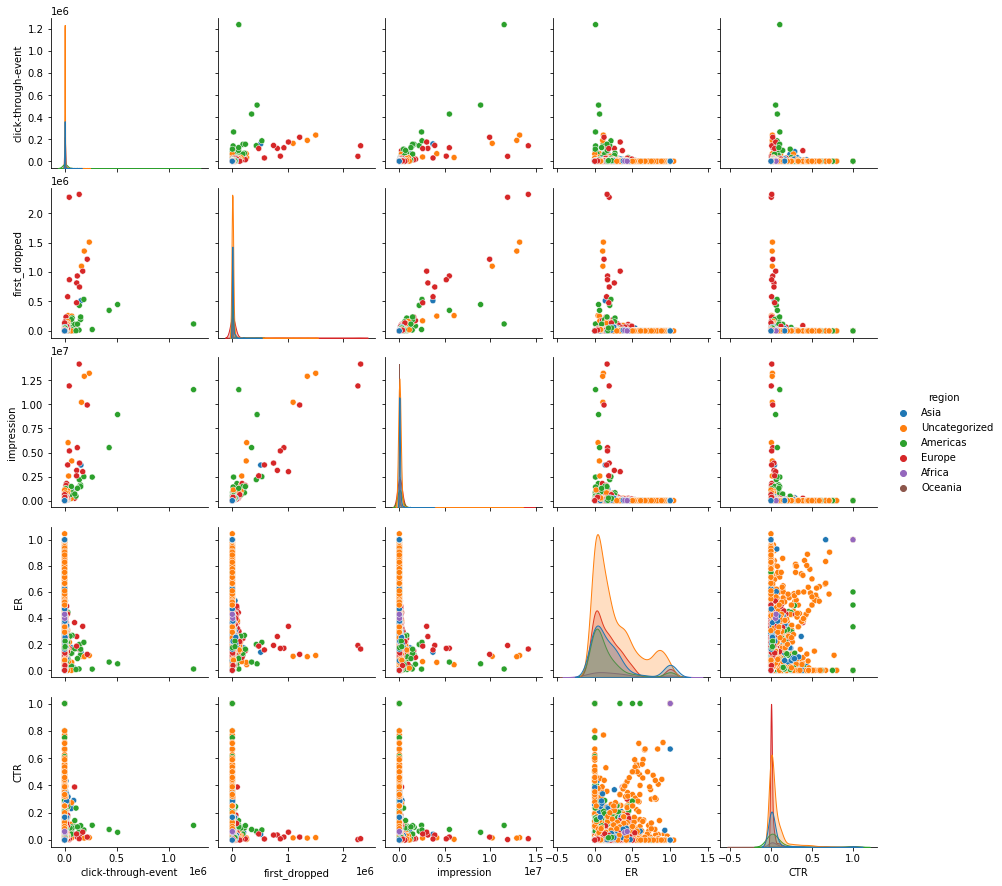

In [15]:
sns.pairplot(data, hue = 'region')

#### Correlation between two categorical variables